In [20]:
import pandas as pd
import pylab as pl
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [26]:
df = pd.read_csv('SelectRecords_EndTime_subset_800m.csv')

In [27]:
df = df.replace(np.nan,'no-event',regex=True)

In [28]:
df.keys()

Index([u'Unnamed: 0', u'tripduration', u'starttime', u'stoptime',
       u'start station id', u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender', u'startdate', u'stopdate',
       u'Event_type', u'End_Time', u'E_Time', u'TripStartHM', u'EventEndHM'],
      dtype='object')

In [63]:
df.groupby('Event_type')['EventEndHM'].mean()

Event_type
basketball    21.315642
boxing        19.691824
concert       22.318391
family        20.501515
hockey        20.908387
no-event      21.000000
other         21.365741
Name: EventEndHM, dtype: float64

In [36]:
data = pd.DataFrame(df.groupby(['startdate','Event_type']).size())

In [37]:
data.reset_index(inplace=True)

In [38]:
data.columns = ['startdate','Type','Count']

In [39]:
data.head()

,startdate,Type,Count
0,2016-01-01,no-event,1
1,2016-01-02,basketball,2
2,2016-01-03,no-event,4
3,2016-01-04,basketball,4
4,2016-01-05,no-event,5


In [40]:
data.Type.unique()

array(['no-event', 'basketball', 'boxing', 'concert', 'other', 'hockey',
       'family'], dtype=object)

In [44]:
data['startdate'] = pd.to_datetime(data['startdate'])

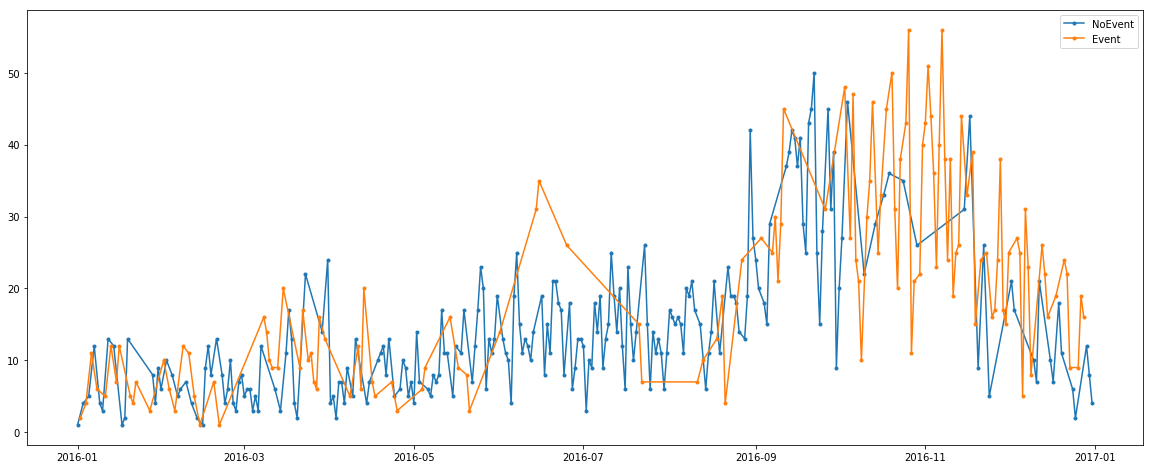

In [53]:
pl.figure(figsize=(20,8))
pl.plot(data[data['Type'] == 'no-event']['startdate'],data[data['Type'] == 'no-event']['Count'],'.-',label='NoEvent')
pl.plot(data[data['Type'] <> 'no-event']['startdate'],data[data['Type'] <> 'no-event']['Count'],'.-',label='Event')
pl.legend()

In [54]:
import statsmodels.formula.api as smf

In [57]:
lm = smf.ols(formula='Count ~ C(Type, Treatment(reference="no-event"))', data=data).fit()

In [58]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     10.41
Date:                Wed, 06 Dec 2017   Prob (F-statistic):           1.23e-10
Time:                        17:24:19   Log-Likelihood:                -1377.4
No. Observations:                 362   AIC:                             2769.
Df Residuals:                     355   BIC:                             2796.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
Intercept                                                 14.3087      0.724     19.771      0.000      12.885      15.732
C(Type, Treatment(reference="no-event"))[T.basketball]     3.9566      1.727      2.291      0.023       0.560       7.353
C(Type, Treatment(reference="no-event"))[T.boxing]        -1.0587      3.947     -0.268      0.789      -8.822       6.705
C(Type, Treatment(reference="no-event"))[T.concert]        0.1913      2.131      0.090      0.929      -3.999       4.381
C(Type, Treatment(reference="no-event"))[T.family]        13.1913      3.250      4.059      0.000       6.800      19.583
C(Type, Treatment(reference="no-event"))[T.hockey]        15.4990      2.271      6.825      0.000      11.033      19.965
C(Type, Treatment(reference="no-event"))[T.other]          1.1199      4.211      0.266      0.790      -7.162       9.402
==============================================================================
Omnibus:                       54.226   Durbin-Watson:                   0.780
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               74.804
Skew:                           1.032   Prob(JB):                     5.71e-17
Kurtosis:                       3.835   Cond. No.                         7.49
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
df.head()

,Unnamed: 0,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,...,usertype,birth year,gender,startdate,stopdate,Event_type,End_Time,E_Time,TripStartHM,EventEndHM
0,0,397,21:51:17,21:57:54,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,365,Fulton St & Grand Ave,...,Subscriber,1970,1,2016-01-01,2016-01-01,no-event,2017-12-05 21:00:00,21:00:00,21.850000,21.0
1,1,218,21:06:04,21:09:42,416,Cumberland St & Lafayette Ave,40.687534,-73.972652,399,Lafayette Ave & St James Pl,...,Subscriber,1986,1,2016-01-02,2016-01-02,basketball,2016-01-02 21:00:00,21:00:00,21.100000,21.0
2,2,638,21:06:16,21:16:54,416,Cumberland St & Lafayette Ave,40.687534,-73.972652,3222,Hanson Pl & St Felix St,...,Subscriber,1974,1,2016-01-02,2016-01-02,basketball,2016-01-02 21:00:00,21:00:00,21.100000,21.0
3,3,292,21:19:57,21:24:49,397,Fulton St & Clermont Ave,40.684157,-73.969223,421,Clermont Ave & Park Ave,...,Subscriber,1984,1,2016-01-03,2016-01-03,no-event,2017-12-05 21:00:00,21:00:00,21.316667,21.0
4,4,621,21:54:07,22:04:28,467,Dean St & 4 Ave,40.683125,-73.978951,3048,Putnam Ave & Nostrand Ave,...,Subscriber,1975,1,2016-01-03,2016-01-03,no-event,2017-12-05 21:00:00,21:00:00,21.900000,21.0
